<a href="https://colab.research.google.com/github/giovannarevitoroz/2.design.driven.domain.fiap/blob/main/checkpoint5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Checkpoint 1 - EDA e Machine Learning
---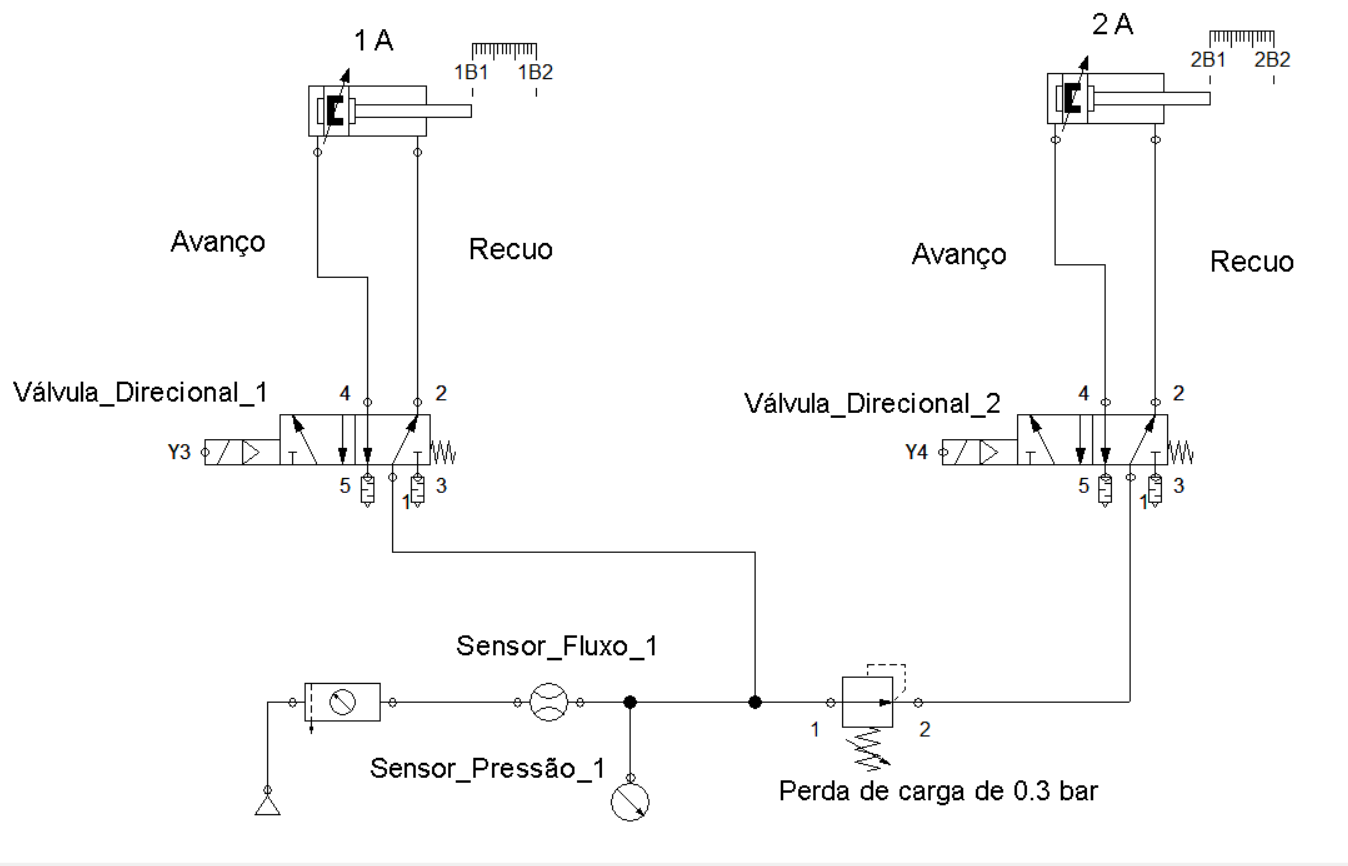

Com base no sistema industrial, foi coletado dados de um sensor de pressão e vazão. Esses dados estão no dataset que estará disponível.

Dado o dataset, as siglas significam:


*   normal: o sistema funciona normalmente;
*   v1a: É o vazamento que foi identificado no avanço da válvula 1 do sistema;
*   v1r: É o vazamento que foi identificado no recuo da válvula 1 do sistema;
*   v2a: É o vazamento que foi identificado no avanço da válvula 2 do sistema;
*   v2r: É o vazamento que foi identificado no recuo da válvula 2 do sistema;
*   v1a: É o vazamento interno que foi identificado no atuador 1 do sistema;
*   v2a: É o vazamento interno que foi identificado no atuador 1 do sistema.

Foram coletadas para todas as classes acima uma variação de 5.4 a 6.6 bar (unidade de pressão).

(3 pts) Fazer uma análise estatística exploratória da base de dados, resumindo as variáveis e o contexto geral da base selecionada. Utilize a biblioteca TSFEL para extrair as características.

(1 pts) Construir 2 gráficos distintos utilizando as variáveis da base. Vocês podem fazer gráficos selecionando parte dos dados de acordo com filtros que julgarem pertinentes. **Atenção**:

1.   Vocês devem variar a seleção de tipos de gráficos e variáveis investigadas. A repetição da mesma variável ou do tipo de gráfico em todas as figuras acarretará desconto de nota;
2.   Todo gráfico deve conter título e legenda. Vocês estão livres para usarem quaisquer configurações a mais que desejarem;
3.	Cada gráfico gerado precisa comunicar uma conclusão relevante/interessante. Caso seu gráfico seja complexo, não deixe de resumi-lo com algumas linhas em comentários *markdown*.

(4 pts) Construir um modelo preditivocom a biblioteca Pycaret. A avaliação partirá dos seguintes critérios:
1. seleção de variável relevante ao Processo como label;
2. seleção apropriada do tipo de modelo com o label selecionado;
3. aplicação de métricas pertinentes ao modelo implementado.
4. implementação correta dos conceitos e passos de *machine learning*;
5. código executado sem erros;
6. conclusões analisando os resultados dos modelos e sua aplicabilidade real.

(1 pts) Construir 1 gráfico do tipo Matriz de Confusão utilizando as variáveis da base. Apresente a performance do modelo com classification report.


**Grupo:**
* Giovanna Revito Roz - RM558981
* João Gabriel Boaventura Marques e Silva - RM558474
* Kaian Gustavo Oliveira Nascimento - RM558986
* Lucas Leal das Chagas - RM551124



Características extraídas:
   Flowmeter_Absolute energy  Flowmeter_Area under the curve  \
0               1.447078e+07                     6533.911486   

   Flowmeter_Autocorrelation  Flowmeter_Average power  Flowmeter_Centroid  \
0                        9.0             42069.892655          172.344696   

   Flowmeter_ECDF Percentile Count_0  Flowmeter_ECDF Percentile Count_1  \
0                             6879.0                            27518.0   

   Flowmeter_ECDF Percentile_0  Flowmeter_ECDF Percentile_1  Flowmeter_ECDF_0  \
0                      12.5488                      27.5252          0.000029   

   ...  Manometer_Wavelet variance_12.5Hz  Manometer_Wavelet variance_2.78Hz  \
0  ...                           0.004738                           0.092307   

   Manometer_Wavelet variance_25.0Hz  Manometer_Wavelet variance_3.12Hz  \
0                           0.001279                           0.076347   

   Manometer_Wavelet variance_3.57Hz  Manometer_Wavelet varia

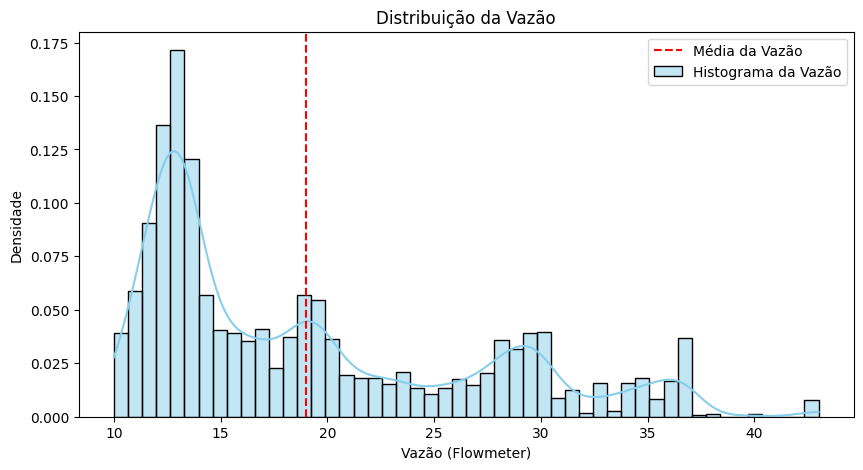

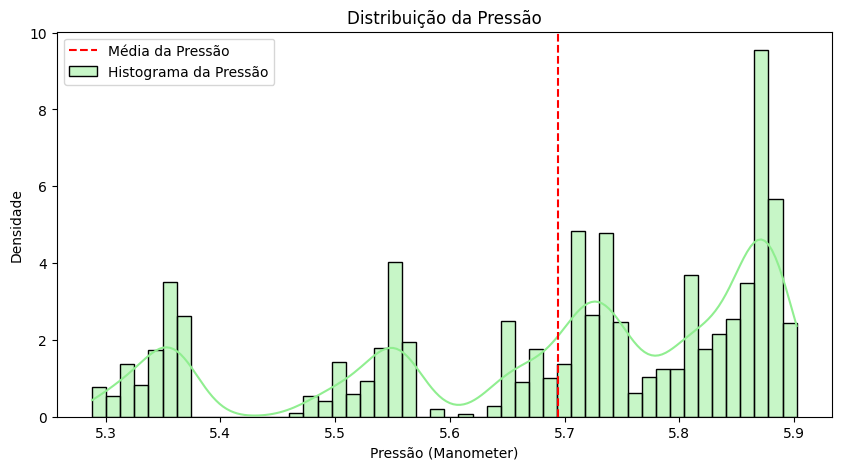

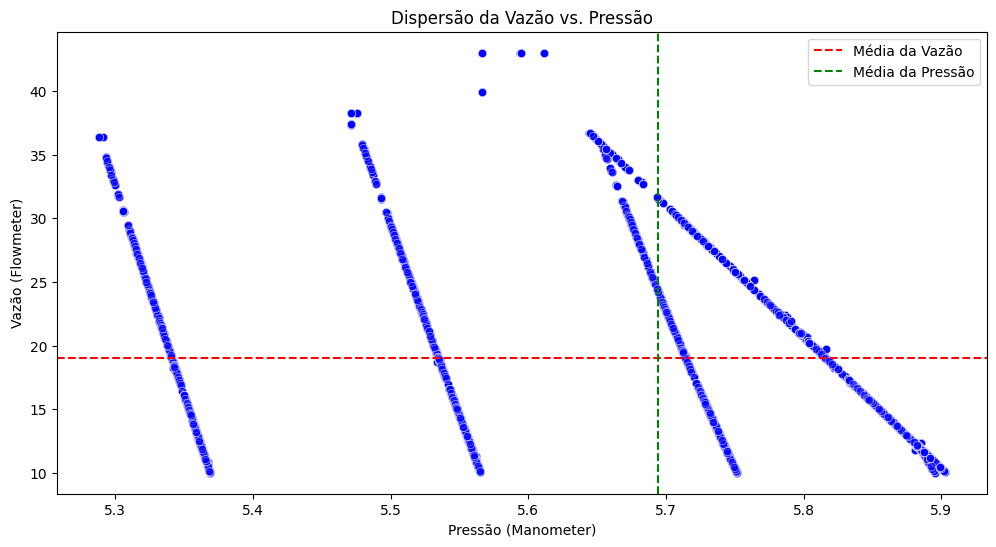

<ipython-input-10-229a4317bc4d>:110: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dt['Timestamp'] = pd.date_range(start='2024-01-01', periods=len(dt), freq='T')  # Frequência de 1 minuto


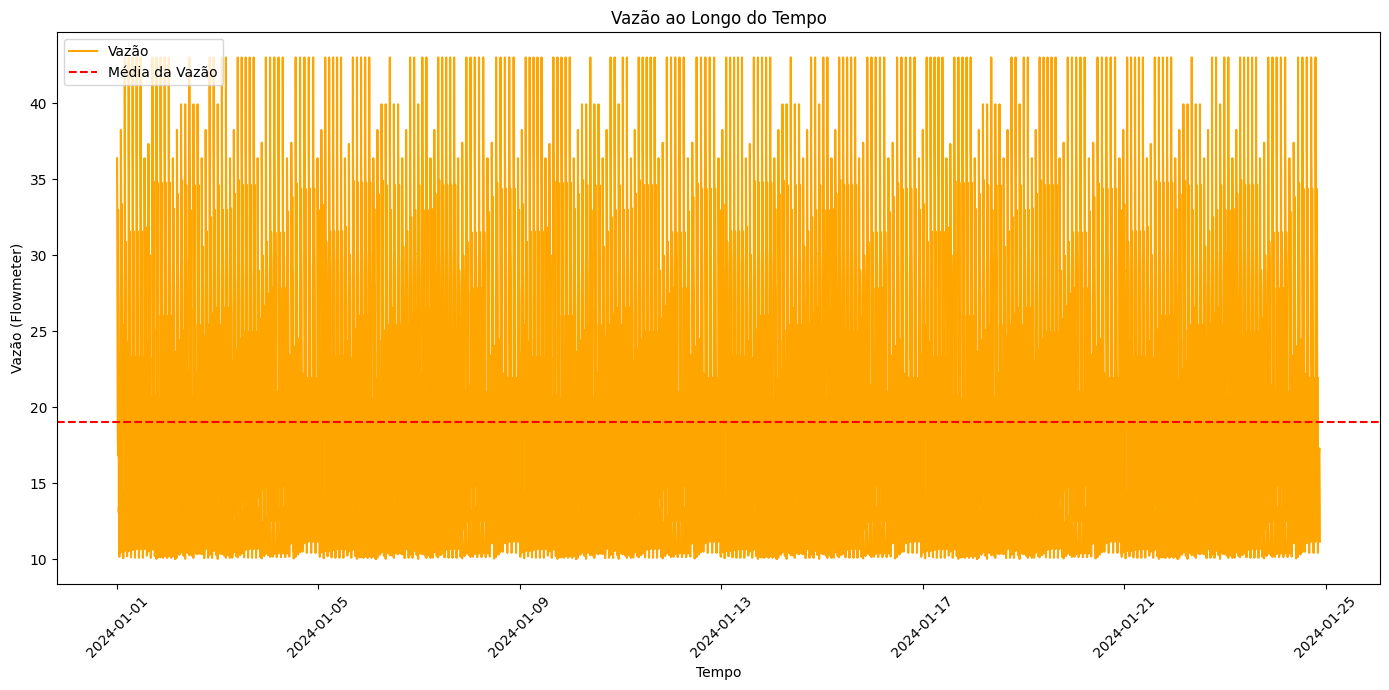

In [10]:
!pip install tsfel
import pandas as pd
import tsfel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Carregando o dataset
# Coloque o caminho do arquivo onde esta localizado o dataset no seu drive para começar a análise!
dataPuro = pd.read_csv('/content/drive/MyDrive/dataset.csv')

# Eliminando itens que não forem numéricos
dataPuro['Flowmeter'] = pd.to_numeric(dataPuro['Flowmeter'], errors='coerce')
dataPuro['Manometer'] = pd.to_numeric(dataPuro['Manometer'], errors='coerce')

# Pegando apenas as colunas de Vazão e Pressão
dt = dataPuro[['Flowmeter', 'Manometer']].copy()

# Removendo valores faltantes
dt = dt.dropna()

# Taxa de amostragem
fs = 100

# Extraindo as características
cfg = tsfel.get_features_by_domain()
features = tsfel.time_series_features_extractor(cfg, dt, fs=fs)

print("\n\nCaracterísticas extraídas:")
print(features.head())

# Estatísticas Descritivas usando funções personalizadas
def calc_max(series):
    return series.max()

def calc_mean(series):
    return series.mean()

def calc_median(series):
    return series.median()

def calc_min(series):
    return series.min()

def calc_std(series):
    return series.std()

def calc_var(series):
    return series.var()

# Calculando estatísticas para as colunas
for col in ['Flowmeter', 'Manometer']:
    print(f"\nEstatísticas para {col}:")
    print(f"Máximo: {calc_max(dt[col])}")
    print(f"Média: {calc_mean(dt[col])}")
    print(f"Mediana: {calc_median(dt[col])}")
    print(f"Mínimo: {calc_min(dt[col])}")
    print(f"Desvio Padrão: {calc_std(dt[col])}")
    print(f"Variância: {calc_var(dt[col])}")

# Visualização dos Dados
print("\nDistribuição da Vazão e da Pressão:\n")

# Histograma da Vazão
plt.figure(figsize=(10, 5))
sns.histplot(dt['Flowmeter'], kde=True, color='skyblue', label='Histograma da Vazão', stat="density", bins=50)
plt.title('Distribuição da Vazão')
plt.xlabel('Vazão (Flowmeter)')
plt.ylabel('Densidade')
plt.axvline(dt['Flowmeter'].mean(), color='red', linestyle='--', label='Média da Vazão')
plt.legend()
plt.show()

print("\n")

# Histograma da Pressão
plt.figure(figsize=(10, 5))
sns.histplot(dt['Manometer'], kde=True, color='lightgreen', label='Histograma da Pressão', stat="density", bins=50)
plt.title('Distribuição da Pressão')
plt.xlabel('Pressão (Manometer)')
plt.ylabel('Densidade')
plt.axvline(dt['Manometer'].mean(), color='red', linestyle='--', label='Média da Pressão')
plt.legend()
plt.show()


"""
(1 pts) Construir 2 gráficos distintos utilizando as variáveis da base. Vocês podem fazer gráficos selecionando parte dos dados de acordo com filtros que julgarem pertinentes. Atenção:

Vocês devem variar a seleção de tipos de gráficos e variáveis investigadas. A repetição da mesma variável ou do tipo de gráfico em todas as figuras acarretará desconto de nota;
Todo gráfico deve conter título e legenda. Vocês estão livres para usarem quaisquer configurações a mais que desejarem;
Cada gráfico gerado precisa comunicar uma conclusão relevante/interessante. Caso seu gráfico seja complexo, não deixe de resumi-lo com algumas linhas em comentários markdown.

"""

# -- 1. Gráfico de Dispersão: Vazão vs. Pressão --
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dt, x='Manometer', y='Flowmeter', alpha=0.6, color='blue')
plt.title('Dispersão da Vazão vs. Pressão')
plt.xlabel('Pressão (Manometer)')
plt.ylabel('Vazão (Flowmeter)')
plt.axhline(dt['Flowmeter'].mean(), color='red', linestyle='--', label='Média da Vazão')
plt.axvline(dt['Manometer'].mean(), color='green', linestyle='--', label='Média da Pressão')
plt.legend()
plt.show()


# Se não houver coluna de timestamps, podemos criar um índice temporal fictício!
if 'Timestamp' not in dataPuro.columns:
    dt['Timestamp'] = pd.date_range(start='2024-01-01', periods=len(dt), freq='T')  # Frequência de 1 minuto

# -- 2. Gráfico de Linhas: Vazão ao Longo do Tempo --
plt.figure(figsize=(14, 7))
plt.plot(dt['Timestamp'], dt['Flowmeter'], label='Vazão', color='orange')
plt.title('Vazão ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Vazão (Flowmeter)')
plt.axhline(dt['Flowmeter'].mean(), color='red', linestyle='--', label='Média da Vazão')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


